In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import pandas_datareader.data as pdr
from cytoolz import sliding_window
import pickle
from itertools import groupby

In [2]:
def test_increasing_value(v):
    if(v>0):
        return 1
    else:
        return 0

def test_decreasing_value(v):
    if(v<0):
        return 1
    else:
        return 0


In [3]:
dict_sectors = {'Basic Materials':'VAW', 'Communication Services':'VOX', 'Consumer Cyclical':'VCR',
       'Consumer Defensive':'VDC', 'Energy':'VDE', 'Financial Services':'VFH', 'Healthcare':'VHT',
       'Industrials':'VIS', 'Real Estate':'VNQ', 'Technology':'VGT', 'Utilities':'VPU', 'error':'error'}

dict_indexes = {'SPTM':'SP1500', 'SPY':'SP500', 'SLY':'SP600', 'MDYG':'SP400','error':'error'}

dict_sectors_reverse = {'VAW':'Basic Materials',
 'VOX':'Communication Services',
 'VCR':'Consumer Cyclical',
 'VDC':'Consumer Defensive',
 'VDE':'Energy',
 'VFH':'Financial Services',
 'VHT':'Healthcare',
 'VIS':'Industrials',
 'VNQ':'Real Estate',
 'VGT':'Technology',
 'VPU':'Utilities',
 'error': 'error'}

In [4]:
def highlight_cells(val):
    color = 'yellow' if val == True else ''
    return 'background-color: {}'.format(color)

In [5]:
si = ['03-31','06-30','09-30','12-31']
               
[start,end, prices_df, sp1500_index_df, sp500, sp600, sp400, market_data, completed_fred_pvt, completed_bonds, completed_bonds_pvt, sectors, indexes, screener_sorted] = pickle.load(open('./data_object.pkl', 'rb'))

prices = prices_df
#prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [6]:
#today = datetime.today().strftime('%Y-%m-%d')
today = end

#past = (datetime.strptime(today, '%Y-%m-%d') - relativedelta(months=21)).strftime('%Y-%m-%d')
past = start

In [7]:
indexes_df = pd.DataFrame()

for s in indexes[0].values:
    indexes_df = pd.concat([prices_df[prices_df['Symbol'] == s][['Adj Close']],indexes_df],axis=1)
    
indexes_df.columns = indexes[0].values

indexes_df_qtr_pvt = indexes_df.asfreq('d').interpolate().resample('W').mean().pct_change()

sectors_df = pd.DataFrame()

for s in sectors[0].values:
    sectors_df = pd.concat([prices_df[prices_df['Symbol'] == s][['Adj Close']],sectors_df],axis=1)
    
sectors_df.columns = sectors[0].values

sectors_df_qtr_pvt = sectors_df.asfreq('D').interpolate().resample('W').mean()

combined_indexes_sectors_df = pd.concat([indexes_df_qtr_pvt,sectors_df_qtr_pvt],axis=1)
combined_indexes_sectors_return_pvt_df = combined_indexes_sectors_df.asfreq('d').interpolate().resample('W').mean().pct_change().dropna()

VOX        VCR         VDC         VDE         VFH  \
2017-02-22   96.039925  70.866066  110.636986  127.404724  116.490662   
2017-02-23   97.030464  71.234825  109.634109  127.109581  115.664032   
2017-02-24   98.333809  71.570053  109.661705  127.366653  116.184166   
2017-02-27   97.847244  71.947174  109.560516  127.395203  116.880760   
2017-02-28   98.724823  71.452705  109.477692  126.614571  116.109886   
...                ...        ...         ...         ...         ...   
2022-06-15  145.539993  89.389999  169.570007  330.410004  166.130005   
2022-06-16  142.639999  87.040001  162.750000  315.970001  159.779999   
2022-06-17  141.440002  87.699997  162.800003  319.809998  159.809998   
2022-06-20  143.322498  88.614998  164.247498  325.870010  161.752495   
2022-06-21  143.949997  88.919998  164.729996  327.890015  162.399994   

                   VHT        VIS         VGT         VAW         VNQ  \
2017-02-22  127.735298  56.948162   83.790840  126.059090  129.170135   
2017-02-23  128.418106  57.011791   84.122688  126.201569  127.993767   
2017-02-24  129.175720  56.593662   83.178223  126.673416  128.567825   
2017-02-27  130.064346  56.829998   84.020561  126.076904  128.840744   
2017-02-28  129.540573  56.648205   83.697250  126.246033  127.871368   
...                ...        ...         ...         ...         ...   
2022-06-15  223.149994  77.639999  114.860001  179.309998  234.580002   
2022-06-16  219.509995  75.419998  108.400002  177.660004  222.740005   
2022-06-17  220.210007  75.849998  102.349998  177.059998  225.869995   
2022-06-20  224.485004  76.952499  106.234999  180.517498  230.047501   
2022-06-21  225.910004  77.320000  107.529999  181.669998  231.440002   

                  VPU  
2017-02-22  91.784111  
2017-02-23  91.590950  
2017-02-24  91.305801  
2017-02-27  91.213799  
2017-02-28  89.907593  
...               ...  
2022-06-15  95.089996  
2022-06-16  91.389999  
2022-06-17  92.860001  
2022-06-20  93.610001  
2022-06-21  93.860001  

[1343 rows x 11 columns]

In [8]:
cli_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CLI.../OECD?contentType=csv&detail=USA&separator=comma&csv-lang=en")
#cli_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CLI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [9]:
bci_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.BCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [10]:
cci_df = pd.read_csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.CCI.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [11]:
np.unique(cci_df.LOCATION)

array(['AUS', 'AUT', 'BEL', 'BRA', 'CHE', 'CHL', 'CHN', 'COL', 'CRI',
       'CZE', 'DEU', 'DNK', 'EA19', 'ESP', 'EST', 'FIN', 'FRA', 'G-7',
       'GBR', 'GRC', 'HUN', 'IDN', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR',
       'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NZL', 'OECD', 'OECDE', 'POL',
       'PRT', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'USA', 'ZAF'],
      dtype=object)

In [12]:
bci_df_USA = bci_df[bci_df['LOCATION']=='USA']
bci_df_USA.index = bci_df_USA[bci_df_USA['LOCATION']=='USA'].set_index('TIME').index.map(lambda t: datetime.strptime(t,'%Y-%m'))
cci_df_USA = cci_df[cci_df['LOCATION']=='USA']
cci_df_USA.index = cci_df_USA[cci_df_USA['LOCATION']=='USA'].set_index('TIME').index.map(lambda t: datetime.strptime(t,'%Y-%m'))
cli_df_USA = cli_df[cli_df['LOCATION']=='USA']
cli_df_USA.index = cli_df_USA[cli_df_USA['LOCATION']=='USA'].set_index('TIME').index.map(lambda t: datetime.strptime(t,'%Y-%m'))

SPTM        SPY       SLY      MDYG       VOX       VCR  \
2022-04-24  -0.880777  -0.958357 -0.267060 -0.317092 -0.007214  0.004634   
2022-05-01   8.224781  30.407780  0.868366  1.016407 -0.026047 -0.015699   
2022-05-08   0.215687  -0.020220 -0.104135 -0.085851 -0.021403 -0.045660   
2022-05-15   0.437538   0.140347  0.137656  0.140712 -0.006638 -0.052366   
2022-05-22  -0.433427  -0.574422 -0.234495 -0.252937  0.003878 -0.022493   
2022-05-29  -1.810921  -2.835551 -1.580616 -1.615414  0.023397  0.017742   
2022-06-05   0.560206   0.259375  0.784354  0.753862  0.015431  0.014917   
2022-06-12  -1.186319  -1.139606 -1.513901 -1.473325 -0.014312 -0.021857   
2022-06-19  11.400383  15.514945  3.983995  4.296942 -0.060999 -0.057529   
2022-06-26  -0.341924  -0.309268 -0.514979 -0.485576 -0.040208 -0.026290   

                 VDC       VDE       VFH       VHT       VIS       VGT  \
2022-04-24 -0.001668 -0.025141 -0.001447 -0.015433 -0.009604  0.000006   
2022-05-01 -0.023415 -0.020558 -0.018688 -0.029611 -0.028992 -0.030179   
2022-05-08 -0.015623 -0.018271 -0.020423 -0.027604 -0.024460  0.015023   
2022-05-15 -0.024582 -0.037736 -0.025503 -0.020717 -0.025483  0.012810   
2022-05-22 -0.011152 -0.031234 -0.020944  0.000964 -0.017104  0.017121   
2022-05-29  0.023796  0.011898  0.008117  0.019301  0.025180  0.050086   
2022-06-05  0.021975  0.027294  0.021714  0.003318  0.024636  0.038697   
2022-06-12 -0.011375 -0.011431 -0.002744 -0.018108 -0.019695  0.017785   
2022-06-19 -0.067489 -0.058090 -0.050637 -0.040180 -0.059235 -0.064617   
2022-06-26 -0.048626 -0.024894 -0.033669 -0.013611 -0.028091 -0.069614   

                 VAW       VNQ       VPU  
2022-04-24  0.010630 -0.005210 -0.037274  
2022-05-01 -0.005042 -0.032039 -0.052813  
2022-05-08 -0.018300 -0.048391 -0.029589  
2022-05-15 -0.012379 -0.057718 -0.022982  
2022-05-22 -0.030515 -0.048966 -0.011012  
2022-05-29 -0.012835 -0.002478  0.006547  
2022-06-05  0.008466  0.035513  0.012533  
2022-06-12 -0.010601 -0.001897 -0.010000  
2022-06-19 -0.033084 -0.059751 -0.051936  
2022-06-26 -0.011058 -0.028097 -0.026571

1955-01-02    101.522034
1955-01-09    101.574539
1955-01-16    101.656213
1955-01-23    101.737887
1955-01-30    101.819561
                 ...    
2022-04-03     99.840238
2022-04-10     99.835707
2022-04-17     99.831869
2022-04-24     99.828030
2022-05-01     99.824191
Freq: W-SUN, Length: 3514, dtype: float64

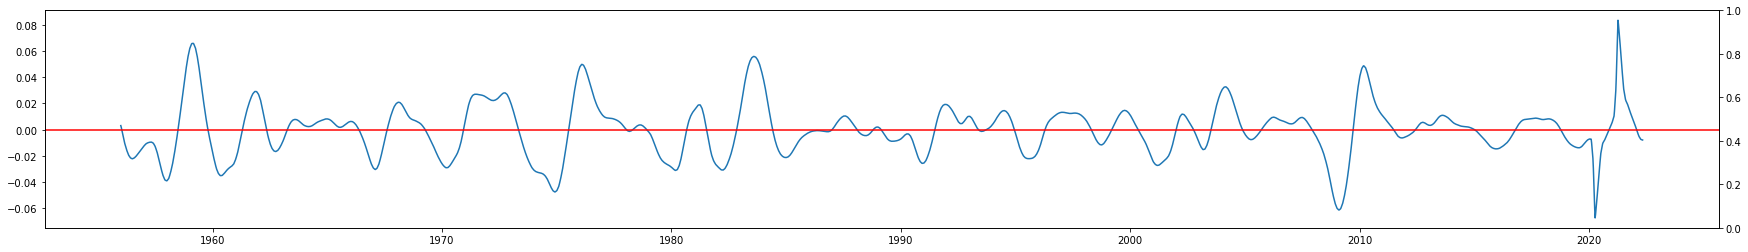

In [13]:
USALOLITONOSTSAM = pdr.DataReader('USALOLITONOSTSAM','fred','1955-01-01',today)-100

USPHCI = pdr.DataReader('USPHCI','fred','1955-01-01',today)
USPHCI_signal = USPHCI.rolling(4).mean()-USPHCI.rolling(12*4).mean()


"""
signal = USALOLITONOSTSAM['USALOLITONOSTSAM']

Recovery = (signal<0)*(signal.pct_change(1)>0)
Expansion = (signal>0)*(signal.pct_change(1)>0)
Slowdown = (signal>0)*(signal.pct_change(1)<0)
Recession = (signal<0)*(signal.pct_change(1)<0)
"""
#combined_leading = pd.concat([cli_df_USA['Value']-100,USALOLITONOSTSAM],axis=1)
combined_leading = pd.concat([cli_df_USA['Value'],USALOLITONOSTSAM+100],axis=1)

#signal = combined_leading.mean(axis=1)
#signal = combined_leading.mean(axis=1).asfreq('d').interpolate().asfreq('q')
#signal = combined_leading.mean(axis=1).asfreq('d').interpolate().resample('W').mean()
modified = combined_leading.mean(axis=1).asfreq('d').interpolate().resample('W').mean()

#QTR_SMA = cli_df_USA['Value'].rolling(3).mean()

fig, ax1 = plt.subplots( figsize=(30,4) )


#plt.plot(signal1)

ax2 = ax1.twinx()

signal = modified.pct_change(52)

ST_SMA = signal.rolling(13*4).mean()
LT_SMA = signal.rolling(52*4).mean()
#signal = ST_SMA - LT_SMA
#signal_ = ST_SMA-LT_SMA

ax1.plot(signal)
#ax2.plot(signal_)

ax1.axhline(y = 0, color = 'r', linestyle = '-')

#troughs
troughs = signal.rolling(52*4).min()
#plt.plot(troughs)
#troughs = trough

#peaks
peaks = signal.rolling(52*4).max()
#plt.plot(peaks)
#peaks = peak

#plt.plot(combined_leading)
#plt.plot(signal_MACD)
#plt.show()

In [14]:
#cli_range_df = cli_df_USA[(cli_df_USA.index<=today) & (cli_df_USA.index>=past)]

In [15]:
#plt.plot(USPHCI.pct_change())

In [16]:
"""
slowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1))& (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak'])# & (business_cycle['signal']!=business_cycle['troughs'])#
np.sum(slowdown)
"""

"\nslowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1))& (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak'])# & (business_cycle['signal']!=business_cycle['troughs'])#\nnp.sum(slowdown)\n"

In [17]:
business_cycle = pd.concat([signal,troughs,peaks,ST_SMA,LT_SMA],axis=1)
business_cycle.columns = ["signal","troughs","peaks","ST_SMA","LT_SMA"]

if(True):
    #expansion = (business_cycle['ST_SMA']>business_cycle['LT_SMA'])&(business_cycle['ST_SMA']>0)
    expansion = (business_cycle['signal']>business_cycle['signal'].shift(1))&(business_cycle['signal']>0)
    #expansion = (business_cycle['signal']==business_cycle['peaks'])&(business_cycle['signal']>0)
    
    #expansion = (business_cycle['ST_SMA'].pct_change()>0)&(business_cycle['signal']>0)
    
    recovery = (business_cycle['signal']>business_cycle['signal'].shift(1))&(business_cycle['signal']<0)
    #recovery = (business_cycle['ST_SMA'].pct_change()>0)&(business_cycle['signal']<0)
    
    #recession = (business_cycle['ST_SMA']>business_cycle['LT_SMA'])&(business_cycle['ST_SMA']<0)
    recession = (business_cycle['signal']<business_cycle['signal'].shift(1))&(business_cycle['signal']<0)
    #recession = (business_cycle['ST_SMA'].pct_change()<0)&(business_cycle['signal']<0)
    slowdown = (business_cycle['signal']<business_cycle['signal'].shift(1))&(business_cycle['signal']>0)
    #slowdown = (business_cycle['signal']<business_cycle['peaks'])&(business_cycle['signal']>0)
    #slowdown = (business_cycle['ST_SMA'].pct_change()<0)&(business_cycle['signal']>0)

if(False):
    expansion = (business_cycle['ST_SMA']>business_cycle['LT_SMA']) #& (business_cycle['signal']==business_cycle['peak'])
    #recovery = (business_cycle['ST_SMA']>business_cycle['ST_SMA'].shift(1)) & (business_cycle['signal']>business_cycle['troughs']) & (business_cycle['ST_SMA']<business_cycle['LT_SMA']) #& (business_cycle['ST_SMA']<business_cycle['LT_SMA'])
    recovery = (expansion==False) & (business_cycle['signal']>business_cycle['troughs'])
    expansion = (expansion) & (recovery==False) 
    #expansion = (business_cycle['ST_SMA']>business_cycle['LT_SMA'])
    #slowdown = (combined['ST_SMA']>combined['LT_SMA']) & (combined['signal']<combined['peak'])

    #slowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1)) & (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak']) & (business_cycle['signal']!=business_cycle['troughs'])
    slowdown = (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1))& (expansion==False) & (recovery==False) & (business_cycle['signal']<business_cycle['peak'])# & (business_cycle['signal']!=business_cycle['troughs'])#
    np.sum(slowdown)
    #recession = (combined['ST_SMA']<combined['LT_SMA']) & (combined['signal']==combined['troughs'])
    #if yesterday's difference less than today's difference
    #recession = (business_cycle['ST_SMA']<business_cycle['LT_SMA']) & (business_cycle['signal']==business_cycle['troughs']) & (business_cycle['signal']<business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].pct_change())>abs(business_cycle['signal'].pct_change().shift(1)))

    #recession = ((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1)) & (business_cycle['signal'] < business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].diff())>(abs(business_cycle['signal'].shift(1).diff()))**2) & (business_cycle['signal']<business_cycle['ST_SMA']) & (((business_cycle['signal']<business_cycle['ST_SMA']) & ((business_cycle['ST_SMA']-business_cycle['signal'])>(((business_cycle['ST_SMA']-business_cycle['signal']).shift(1))))))
    recession = ((business_cycle['signal']==business_cycle['troughs'])&((business_cycle['ST_SMA']-business_cycle['signal'])/(business_cycle['peak']-business_cycle['signal'])>.25)) #\
    """
    &\
    ((business_cycle['signal'].pct_change()/business_cycle['signal'].pct_change().shift(1))>1.5)
    """
    """
    &\
    ((business_cycle['LT_SMA']-business_cycle['ST_SMA'])>(business_cycle['LT_SMA']-business_cycle['ST_SMA']).shift(1))\
    &((business_cycle['ST_SMA']-business_cycle['signal'])>(business_cycle['ST_SMA']-business_cycle['signal']).shift(1))\
    &((business_cycle['peak']-business_cycle['LT_SMA'])>(business_cycle['peak']-business_cycle['LT_SMA']).shift(1))\
    &((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))\
    """
    #&(business_cycle['signal'].pct_change()<-.25)

    #& ((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1)) & (business_cycle['signal'] < business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].diff())>(abs(business_cycle['signal'].shift(1).diff()))**2) & (business_cycle['signal']<business_cycle['ST_SMA']) & (((business_cycle['signal']<business_cycle['ST_SMA']) & ((business_cycle['ST_SMA']-business_cycle['signal'])>(((business_cycle['ST_SMA']-business_cycle['signal']).shift(1))))))

    #recession = (business_cycle['troughs']<business_cycle['troughs'].shift(1))&(abs(business_cycle['troughs'].pct_change())>abs(business_cycle['troughs'].pct_change()).shift(1))
    #((business_cycle['signal']<business_cycle['ST_SMA'])&(abs(business_cycle['signal']<business_cycle['ST_SMA']))>(abs(business_cycle['LT_SMA']-business_cycle['ST_SMA'])))

    #recession = (business_cycle['ST_SMA']<business_cycle['LT_SMA']) & (business_cycle['signal']<business_cycle['signal'].shift(1)) & (abs(business_cycle['signal'].pct_change())>abs(2*business_cycle['signal'].pct_change().shift(1))) & (business_cycle['ST_SMA']<business_cycle['ST_SMA'].shift(1)) & (abs(business_cycle['ST_SMA'].pct_change())>abs(business_cycle['ST_SMA'].pct_change().shift(1))) \
    #& ((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))
    slowdown = (slowdown) & (slowdown!=recession) & (slowdown!=recovery) & (slowdown!=expansion)

business_cycle = pd.concat([business_cycle,recovery,expansion,slowdown,recession],axis=1)
business_cycle = business_cycle.dropna()
business_cycle.columns = [*business_cycle.columns[0:5],'recovery','expansion','slowdown','recession']
#slowdown = combined['ST_SMA']<combined['LT_SMA']
    


In [18]:
"""
#The LEI Index YoY changes are positive and above long-term trends
#Expansion = (cli_df_USA['Value']>LT_SMA) * (ST_SMA.pct_change()>0) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))

#***
#Expansion = (signal>LT_SMA) * (ST_SMA.pct_change()>0) * (signal>signal.shift(1))

#Expansion = (signal>LT_SMA) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# * (signal>signal.shift(1))
Expansion =  (signal>signal.shift(1)) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# *
np.sum(Expansion)

#Recovery = (cli_df_USA['Value'] > troughs) * (cli_df_USA['Value']<LT_SMA) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))
Recovery = (signal > troughs) * (signal>signal.shift(1)) * (Expansion==0) * (signal<LT_SMA)
np.sum(Recovery)

print(np.sum(Recovery*Expansion))

Declining = ((Recovery!=1)*(Expansion!=1))
print(np.sum(Declining))

###Recession

today_minus_yesterday = signal-signal.shift(1)

yesterday_minus_today = signal.shift(1)-signal

#rapidly declines to a troughs

#today is less than yesterday
#at an accelerating pace OR
    #yesterday was receding
#Recession = ((today_minus_yesterday<0) * ((np.abs(today_minus_yesterday)>np.abs(today_minus_yesterday.shift(1))).values|(today_minus_yesterday.shift(1)<0).values)) # * (signal == troughs))
Recession = ((today_minus_yesterday<0) * ((np.abs(today_minus_yesterday)>np.abs(today_minus_yesterday.shift(1))).values)) * (signal == troughs)

print(np.sum(Recession))

#prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]

Not_recession = (Recession==0)*(Recovery==0)*(Expansion==0)#*(signal<peak)
Slowdown = Not_recession
print(Slowdown)

#Slowdown = (ST_SMA < peaks)
#recession = Recession
#slowdown = Slowdown
#recovery = Recovery
#expansion = Expansion
"""

"\n#The LEI Index YoY changes are positive and above long-term trends\n#Expansion = (cli_df_USA['Value']>LT_SMA) * (ST_SMA.pct_change()>0) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))\n\n#***\n#Expansion = (signal>LT_SMA) * (ST_SMA.pct_change()>0) * (signal>signal.shift(1))\n\n#Expansion = (signal>LT_SMA) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# * (signal>signal.shift(1))\nExpansion =  (signal>signal.shift(1)) * np.logical_or(((ST_SMA>LT_SMA).values),((ST_SMA.pct_change()>0).values))# *\nnp.sum(Expansion)\n\n#Recovery = (cli_df_USA['Value'] > troughs) * (cli_df_USA['Value']<LT_SMA) * (cli_df_USA['Value']>cli_df_USA['Value'].shift(1))\nRecovery = (signal > troughs) * (signal>signal.shift(1)) * (Expansion==0) * (signal<LT_SMA)\nnp.sum(Recovery)\n\nprint(np.sum(Recovery*Expansion))\n\nDeclining = ((Recovery!=1)*(Expansion!=1))\nprint(np.sum(Declining))\n\n###Recession\n\ntoday_minus_yesterday = signal-signal.shift(1)\n\nyesterday_minus_today = si

In [19]:
"""
np.sum(\
((business_cycle['LT_SMA']-business_cycle['ST_SMA'])>(business_cycle['LT_SMA']-business_cycle['ST_SMA']).shift(1))\
&((business_cycle['ST_SMA']-business_cycle['signal'])>(business_cycle['ST_SMA']-business_cycle['signal']).shift(1))\
&((business_cycle['peak']-business_cycle['LT_SMA'])>(business_cycle['peak']-business_cycle['LT_SMA']).shift(1))\
&((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))\
      )
"""

"\nnp.sum(((business_cycle['LT_SMA']-business_cycle['ST_SMA'])>(business_cycle['LT_SMA']-business_cycle['ST_SMA']).shift(1))&((business_cycle['ST_SMA']-business_cycle['signal'])>(business_cycle['ST_SMA']-business_cycle['signal']).shift(1))&((business_cycle['peak']-business_cycle['LT_SMA'])>(business_cycle['peak']-business_cycle['LT_SMA']).shift(1))&((business_cycle['peak']-business_cycle['troughs'])>(business_cycle['peak']-business_cycle['troughs']).shift(1))      )\n"

In [20]:
#(business_cycle['signal']<business_cycle['ST_SMA']) & (business_cycle['ST_SMA']-business_cycle['signal'])>(2*((business_cycle['ST_SMA']-business_cycle['signal']).shift(1)))

In [21]:
#plt.plot(business_cycle['signal'].pct_change())

In [22]:
#business_cycle['signal'][business_cycle['signal'].index>'2020-01-01'].pct_change().head(30)

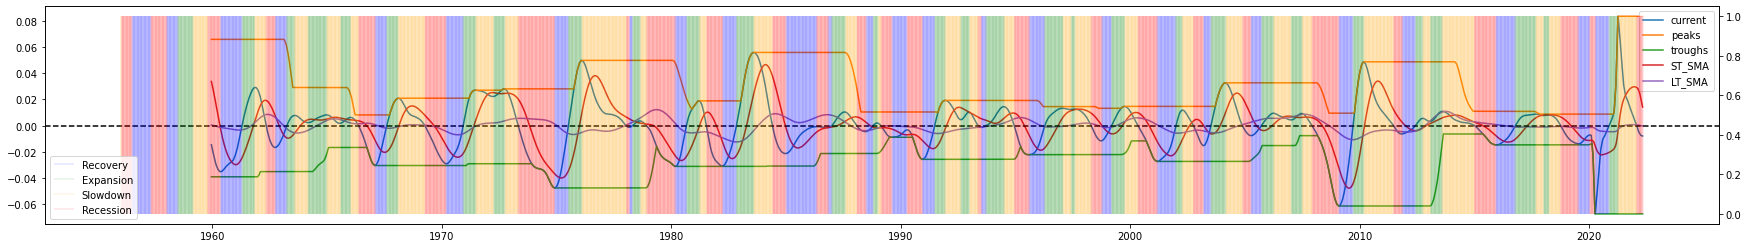

In [23]:
fig, ax1 = plt.subplots( figsize=(30,4) )
#plt.plot(cli_df_USA['Value'])
ax1.plot(business_cycle['signal'])

ax1.plot(business_cycle['peaks'])
ax1.plot(business_cycle['troughs'])
ax1.plot(business_cycle['ST_SMA'])
ax1.plot(business_cycle['LT_SMA'])
ax1.axhline(y = 0, color = 'black', linestyle = '--')
ax1.legend(['current','peaks','troughs','ST_SMA','LT_SMA'],loc=1)
#plt.legend(['current','ST_SMA','LT_SMA'],loc=1)

ax2 = ax1.twinx()

trans = mtransforms.blended_transform_factory(ax2.transData, ax2.transAxes)

ax2.vlines((recovery == 1).index[(recovery == 1).values],color='blue', alpha=0.1, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recovery')
ax2.vlines((expansion == 1).index[(expansion == 1).values],color='green', alpha=0.1, ymin=0, ymax=1, colors=None, linestyles='solid',label='Expansion')
ax2.vlines((slowdown == 1).index[(slowdown == 1).values],color='orange', alpha=0.1, ymin=0, ymax=1, colors=None, linestyles='solid',label='Slowdown')
ax2.vlines((recession == 1).index[(recession == 1).values],color='red', alpha=0.1, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recession')

ax2.legend(['Recovery','Expansion','Slowdown','Recession'],loc=3)
plt.show()

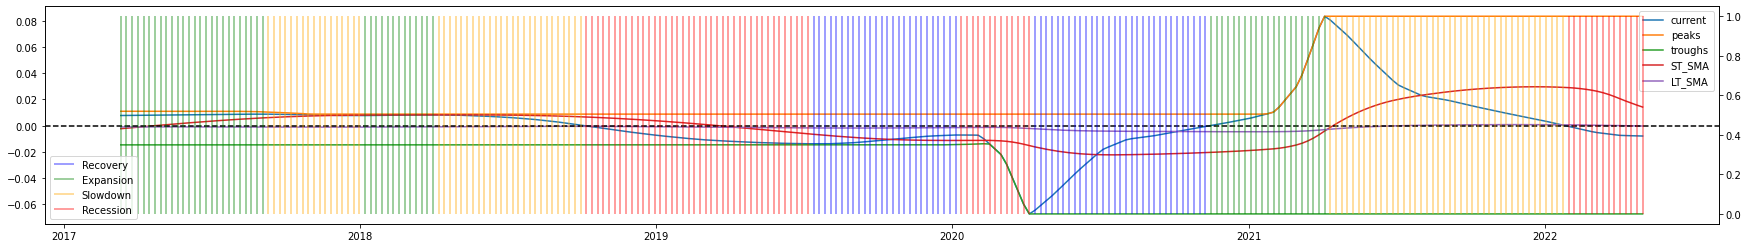

In [24]:
fig, ax1 = plt.subplots( figsize=(30,4) )
#plt.plot(cli_df_USA['Value'])
ax1.plot(business_cycle['signal'].reindex(combined_indexes_sectors_return_pvt_df.index))

ax1.plot(business_cycle['peaks'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.plot(business_cycle['troughs'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.plot(business_cycle['ST_SMA'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.plot(business_cycle['LT_SMA'].reindex(combined_indexes_sectors_return_pvt_df.index))
ax1.axhline(y = 0, color = 'black', linestyle = '--')
ax1.legend(['current','peaks','troughs','ST_SMA','LT_SMA'],loc=1)
#plt.legend(['current','ST_SMA','LT_SMA'],loc=1)

ax2 = ax1.twinx()

trans = mtransforms.blended_transform_factory(ax2.transData, ax2.transAxes)

"""
ax2.fill_between(business_cycle.index, 0, 1, where=Recovery['USPHCI'].reindex(business_cycle.index) == 1,facecolor='blue', alpha=0.5, transform=trans)
ax2.fill_between(business_cycle.index, 0, 1, where=Expansion['USPHCI'].reindex(business_cycle.index) == 1,facecolor='orange', alpha=0.5, transform=trans)
ax2.fill_between(business_cycle.index, 0, 1, where=Slowdown['USPHCI'].reindex(business_cycle.index) == 1,facecolor='green', alpha=0.5, transform=trans)
ax2.fill_between(business_cycle.index, 0, 1, where=Recession['USPHCI'].reindex(business_cycle.index) == 1,facecolor='red', alpha=0.5, transform=trans)
"""   
 
ax2.vlines((recovery.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(recovery.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='blue', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recovery')
ax2.vlines((expansion.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(expansion.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='green', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Expansion')
ax2.vlines((slowdown.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(slowdown.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='orange', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Slowdown')
ax2.vlines((recession.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).index[(recession.reindex(combined_indexes_sectors_return_pvt_df.index) == 1).values],color='red', alpha=0.5, ymin=0, ymax=1, colors=None, linestyles='solid',label='Recession')

ax2.legend(['Recovery','Expansion','Slowdown','Recession'],loc=3)
plt.show()

signal   troughs     peaks    ST_SMA    LT_SMA  recovery  \
1959-12-20 -0.014589 -0.039025  0.065888  0.033706  0.000506     False   
1959-12-27 -0.016237 -0.039025  0.065888  0.032227  0.000413     False   
1960-01-03 -0.017859 -0.039025  0.065888  0.030690  0.000318     False   
1960-01-10 -0.019345 -0.039025  0.065888  0.029107  0.000224     False   
1960-01-17 -0.020809 -0.039025  0.065888  0.027480  0.000130     False   
...              ...       ...       ...       ...       ...       ...   
2022-04-03 -0.007407 -0.067361  0.083533  0.020555  0.000044     False   
2022-04-10 -0.007573 -0.067361  0.083533  0.018858 -0.000031     False   
2022-04-17 -0.007683 -0.067361  0.083533  0.017236 -0.000107     False   
2022-04-24 -0.007793 -0.067361  0.083533  0.015685 -0.000183     False   
2022-05-01 -0.007900 -0.067361  0.083533  0.014208 -0.000259     False   

            expansion  slowdown  recession  
1959-12-20      False     False       True  
1959-12-27      False     False       True  
1960-01-03      False     False       True  
1960-01-10      False     False       True  
1960-01-17      False     False       True  
...               ...       ...        ...  
2022-04-03      False     False       True  
2022-04-10      False     False       True  
2022-04-17      False     False       True  
2022-04-24      False     False       True  
2022-05-01      False     False       True  

[3255 rows x 9 columns]

SPTM        SPY        SLY       MDYG       VOX       VCR  \
2017-03-12  -4.315757   2.854574  -0.860680  -1.104889 -0.002839 -0.023553   
2017-03-19  -0.710540  -0.733298  -0.525292  -0.365216  0.000165 -0.014524   
2017-03-26   2.034856   0.604540 -14.688727  12.402821  0.010027  0.003986   
2017-04-02  -0.612614  -0.785598  -0.570334  -0.819232  0.003075  0.005414   
2017-04-09  -1.639510   0.075606  -1.740832  -3.141043 -0.000126  0.010772   
...               ...        ...        ...        ...       ...       ...   
2022-05-29  -1.810921  -2.835551  -1.580616  -1.615414  0.023397  0.017742   
2022-06-05   0.560206   0.259375   0.784354   0.753862  0.015431  0.014917   
2022-06-12  -1.186319  -1.139606  -1.513901  -1.473325 -0.014312 -0.021857   
2022-06-19  11.400383  15.514945   3.983995   4.296942 -0.060999 -0.057529   
2022-06-26  -0.341924  -0.309268  -0.514979  -0.485576 -0.040208 -0.026290   

                 VDC       VDE       VFH       VHT       VIS       VGT  \
2017-03-12 -0.006222  0.002287 -0.002629  0.005726  0.000900 -0.009295   
2017-03-19 -0.000091  0.006010 -0.003573  0.001263 -0.004114 -0.012939   
2017-03-26 -0.001353  0.000280 -0.007516 -0.006777 -0.023287 -0.009423   
2017-04-02 -0.000111  0.001794 -0.002941 -0.004732 -0.013911  0.003117   
2017-04-09  0.004583  0.000977  0.002893 -0.001223 -0.001172  0.013035   
...              ...       ...       ...       ...       ...       ...   
2022-05-29  0.023796  0.011898  0.008117  0.019301  0.025180  0.050086   
2022-06-05  0.021975  0.027294  0.021714  0.003318  0.024636  0.038697   
2022-06-12 -0.011375 -0.011431 -0.002744 -0.018108 -0.019695  0.017785   
2022-06-19 -0.067489 -0.058090 -0.050637 -0.040180 -0.059235 -0.064617   
2022-06-26 -0.048626 -0.024894 -0.033669 -0.013611 -0.028091 -0.069614   

                 VAW       VNQ       VPU  
2017-03-12 -0.002782 -0.001428 -0.020972  
2017-03-19  0.002027  0.004079 -0.002007  
2017-03-26  0.002015 -0.000921  0.000302  
2017-04-02 -0.001958  0.003971 -0.007262  
2017-04-09 -0.001401  0.004552  0.006924  
...              ...       ...       ...  
2022-05-29 -0.012835 -0.002478  0.006547  
2022-06-05  0.008466  0.035513  0.012533  
2022-06-12 -0.010601 -0.001897 -0.010000  
2022-06-19 -0.033084 -0.059751 -0.051936  
2022-06-26 -0.011058 -0.028097 -0.026571  

[277 rows x 15 columns]

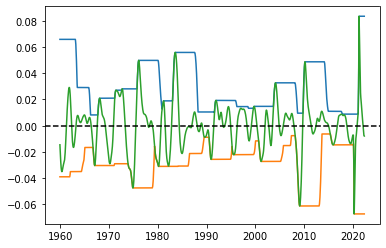

In [25]:
plt.plot(business_cycle[['peaks','troughs']])
plt.plot(business_cycle[['signal']])
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()

In [26]:
np.sum(business_cycle.iloc[:,-4:])

recovery     705
expansion    774
slowdown     970
recession    806
dtype: int64

In [27]:
np.sum(np.sum(business_cycle.iloc[:,-4:]))

3255

In [28]:
#Slowdown = (ST_SMA < peak)
#np.sum(Slowdown)

In [29]:
"""
Slowdown = (ST_SMA.pct_change()<0) * (cli_df_USA['Value']<peaks)# (ST_SMA<LT_SMA)
Slowdown = (signal.pct_change()<0) * (signal<peak)# (ST_SMA<LT_SMA)
np.sum(Slowdown)
"""

"\nSlowdown = (ST_SMA.pct_change()<0) * (cli_df_USA['Value']<peaks)# (ST_SMA<LT_SMA)\nSlowdown = (signal.pct_change()<0) * (signal<peak)# (ST_SMA<LT_SMA)\nnp.sum(Slowdown)\n"

In [30]:
#plt.plot(prior_recession * Slowdown['USPHCI'])

In [31]:
"""
print(np.sum(Slowdown))

while (np.sum(prior_recession * Slowdown['USPHCI'])>0):
     
    positions = prior_recession * Slowdown['USPHCI']
    
    #print(np.where(positions))
    
    Recession.iloc[positions] = True
    Slowdown.iloc[positions] = False

    prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]
    Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)
    #positions = np.intersect1d(prior_recession,Slowdown)
    #Recession.iloc[positions] = True
    #Slowdown.iloc[positions] = False
    #prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]
    #Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)
    
    
    
    #print(np.sum(Slowdown))

    
"""

"\nprint(np.sum(Slowdown))\n\nwhile (np.sum(prior_recession * Slowdown['USPHCI'])>0):\n     \n    positions = prior_recession * Slowdown['USPHCI']\n    \n    #print(np.where(positions))\n    \n    Recession.iloc[positions] = True\n    Slowdown.iloc[positions] = False\n\n    prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]\n    Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)\n    #positions = np.intersect1d(prior_recession,Slowdown)\n    #Recession.iloc[positions] = True\n    #Slowdown.iloc[positions] = False\n    #prior_recession = [1 if a[0] else 0 for a in (Recession.shift(1)==1).values]\n    #Slowdown = (Recession==0)*(Recovery==0)*(Expansion==0)*(signal<peak)\n    \n    \n    \n    #print(np.sum(Slowdown))\n\n    \n"

In [32]:
"""
list1 = [-1, -1, 1, 1, 1, -1, 1]
count_dups = [sum(1 for _ in group) for _, group in groupby(list1)]
print(count_dups)
"""

#business_cycle = pd.concat([signal,Recovery,Expansion,Slowdown,Recession],axis=1)
#business_cycle.columns=['Leading','Recovery','Expansion','Slowdown','Recession']
#business_cycle = business_cycle.reindex(peak.dropna().index).dropna()

"""
for c_ in range(1,len(business_cycle.iloc[:,1:].columns)+1):
    c = business_cycle.iloc[:,1:].columns[c_-1]
    business_cycle[c][business_cycle[c]==True] = c_
    business_cycle[c][business_cycle[c]==False] = np.nan

repeats = business_cycle.iloc[:,1:].bfill(axis=1).iloc[:, 0]

#list1 = [-1, -1, 1, 1, 1, -1, 1]
count_dups = [sum(1 for _ in group) for _, group in groupby(repeats)]
print(count_dups)

"""

'\nfor c_ in range(1,len(business_cycle.iloc[:,1:].columns)+1):\n    c = business_cycle.iloc[:,1:].columns[c_-1]\n    business_cycle[c][business_cycle[c]==True] = c_\n    business_cycle[c][business_cycle[c]==False] = np.nan\n\nrepeats = business_cycle.iloc[:,1:].bfill(axis=1).iloc[:, 0]\n\n#list1 = [-1, -1, 1, 1, 1, -1, 1]\ncount_dups = [sum(1 for _ in group) for _, group in groupby(repeats)]\nprint(count_dups)\n\n'

In [33]:
"""
iter = 0
values = []
iterator=0
for c_ in range(0,len(count_dups)):
    c = count_dups[c_]
    #values.append()
    #c_* len(iterator)
    iterator = iterator + c - 1
    values.append(repeats[c_+iterator])
    
values_df = pd.DataFrame(values)

values_df[(values_df==3)*(values_df.shift(1)==4)] = 4
"""

'\niter = 0\nvalues = []\niterator=0\nfor c_ in range(0,len(count_dups)):\n    c = count_dups[c_]\n    #values.append()\n    #c_* len(iterator)\n    iterator = iterator + c - 1\n    values.append(repeats[c_+iterator])\n    \nvalues_df = pd.DataFrame(values)\n\nvalues_df[(values_df==3)*(values_df.shift(1)==4)] = 4\n'

In [34]:
"""
fig, ax1 = plt.subplots( figsize=(30,4) )
plt.plot(recession.reindex(combined_indexes_sectors_return_pvt_df.index))
#plt.fill_between(recession.reindex(combined_indexes_sectors_return_pvt_df.index), 0, 1, where=recession.reindex(combined_indexes_sectors_return_pvt_df.index),
    #facecolor='blue', alpha=0.5, transform=trans)
#plt.legend(loc=1)
#plt.legend(loc=3)
plt.show()
"""

"\nfig, ax1 = plt.subplots( figsize=(30,4) )\nplt.plot(recession.reindex(combined_indexes_sectors_return_pvt_df.index))\n#plt.fill_between(recession.reindex(combined_indexes_sectors_return_pvt_df.index), 0, 1, where=recession.reindex(combined_indexes_sectors_return_pvt_df.index),\n    #facecolor='blue', alpha=0.5, transform=trans)\n#plt.legend(loc=1)\n#plt.legend(loc=3)\nplt.show()\n"

In [35]:
#business_cycle.reindex(combined_indexes_sectors_return_pvt_df.index).style.applymap(highlight_cells)

In [50]:
business_cycles_sectors_indexes = pd.concat([business_cycle,combined_indexes_sectors_return_pvt_df],axis=1).dropna()

In [36]:
#business_cycle.reindex(combined_indexes_sectors_return_pvt_df.index).iloc[:,1:].sum(axis=1).max()

1.0466520113937503

In [38]:
#business_cycle.reindex('troughs'.index).iloc[:,1:].sum(axis=0)

In [ ]:
#today_minus_yesterday.map(lambda t: test_decreasing_value(t))

In [52]:
business_cycles_sectors_indexes

signal   troughs     peaks    ST_SMA    LT_SMA recovery  \
2017-03-12  0.007766 -0.014657  0.010991 -0.002318 -0.000981    False   
2017-03-19  0.007805 -0.014657  0.010991 -0.001921 -0.000966    False   
2017-03-26  0.007844 -0.014657  0.010991 -0.001528 -0.000953    False   
2017-04-02  0.007882 -0.014657  0.010991 -0.001139 -0.000941    False   
2017-04-09  0.007910 -0.014657  0.010991 -0.000754 -0.000931    False   
...              ...       ...       ...       ...       ...      ...   
2022-04-03 -0.007407 -0.067361  0.083533  0.020555  0.000044    False   
2022-04-10 -0.007573 -0.067361  0.083533  0.018858 -0.000031    False   
2022-04-17 -0.007683 -0.067361  0.083533  0.017236 -0.000107    False   
2022-04-24 -0.007793 -0.067361  0.083533  0.015685 -0.000183    False   
2022-05-01 -0.007900 -0.067361  0.083533  0.014208 -0.000259    False   

           expansion slowdown recession      SPTM  ...       VCR       VDC  \
2017-03-12      True    False     False -4.315757  ... -0.023553 -0.006222   
2017-03-19      True    False     False -0.710540  ... -0.014524 -0.000091   
2017-03-26      True    False     False  2.034856  ...  0.003986 -0.001353   
2017-04-02      True    False     False -0.612614  ...  0.005414 -0.000111   
2017-04-09      True    False     False -1.639510  ...  0.010772  0.004583   
...              ...      ...       ...       ...  ...       ...       ...   
2022-04-03     False    False      True -0.578489  ...  0.022858  0.020837   
2022-04-10     False    False      True -2.339182  ...  0.015509 -0.003710   
2022-04-17     False    False      True  0.226389  ... -0.004868 -0.000983   
2022-04-24     False    False      True -0.880777  ...  0.004634 -0.001668   
2022-05-01     False    False      True  8.224781  ... -0.015699 -0.023415   

                 VDE       VFH       VHT       VIS       VGT       VAW  \
2017-03-12  0.002287 -0.002629  0.005726  0.000900 -0.009295 -0.002782   
2017-03-19  0.006010 -0.003573  0.001263 -0.004114 -0.012939  0.002027   
2017-03-26  0.000280 -0.007516 -0.006777 -0.023287 -0.009423  0.002015   
2017-04-02  0.001794 -0.002941 -0.004732 -0.013911  0.003117 -0.001958   
2017-04-09  0.000977  0.002893 -0.001223 -0.001172  0.013035 -0.001401   
...              ...       ...       ...       ...       ...       ...   
2022-04-03  0.031068  0.006302  0.012880  0.001885  0.021162  0.017239   
2022-04-10 -0.014550 -0.019693  0.014279 -0.021362  0.003009  0.019380   
2022-04-17 -0.040917 -0.018575 -0.001304 -0.021486  0.017755  0.014005   
2022-04-24 -0.025141 -0.001447 -0.015433 -0.009604  0.000006  0.010630   
2022-05-01 -0.020558 -0.018688 -0.029611 -0.028992 -0.030179 -0.005042   

                 VNQ       VPU  
2017-03-12 -0.001428 -0.020972  
2017-03-19  0.004079 -0.002007  
2017-03-26 -0.000921  0.000302  
2017-04-02  0.003971 -0.007262  
2017-04-09  0.004552  0.006924  
...              ...       ...  
2022-04-03  0.025743  0.023111  
2022-04-10 -0.012045 -0.004431  
2022-04-17 -0.022933 -0.025165  
2022-04-24 -0.005210 -0.037274  
2022-05-01 -0.032039 -0.052813  

[269 rows x 24 columns]

In [53]:
np.sum(business_cycles_sectors_indexes.reindex(business_cycles_sectors_indexes.index).iloc[:,5:9].sum(axis=0))

269